# Exclusion-from-FeatureTable-or-mzTab notebook for IODA

**Purpose**: The `IODA exclusion-from-FeatureTable-or-mzTab` notebook allows to generate exclusion lists for Iterative Optimise Data Acquisition (IODA) of fragmentation spectra in LC-MS.

**Usage**: This notebook requires the user to provide an `feature table` or `mzTab` from one "blank" sample.  All the ions detected will be added to exclusion list. The IODA-exclusion workflows formats the ions for exclusion with XCalibur or [MaxQuant.Live]. If you need to generate an mzTab, we recommend using the dedicated [IODA exclusion-from-mzML notebook](IODA_exclusion_from_mzML.ipynb) using OpenMS. 

**Documentation**: Please refer to the [documentation page](link) for more informations for IODA exclusion-from-FeatureTable-or-mzTab worklow.

**Instructions**: Follow the instructions below and run the notebook cells accordingly.

### Step 0 - Generate a feature table or an mzTab

The `feature table` or the `mzTab` file must contain must contain the results for feature detection  of one "blank" sample. Please refer to the [documentation page](link) for more information. 

The `feature table` must be comma separated '.csv' file with the following columns: `Mass[m/z]`, `retention_time`, `charge`, `sample_name`, `rt_start`, `rt_end`

The `sample_name` contains the absolute intensities in the sample(s). The `rt_start` and `rt_end` indicates the beginning and end of the chromatographic peak (in minutes).

### Step 1 - Upload the input file

##### <span style="color:brown">Method 1 - Upload your mzTab file </span>

Upload your file on the Binder server with the Jupyter lab interface (drag-and-drop the file in the left panel or use the "Upload" icon). 

##### <span style="color:brown">Method 2 - Web-sharing links</span>
We support retrieving the files from the following cloud sharing services:
> **Google Drive** : copy the sharing the link (make sure the sharing setting is set to 'Anyone with the link can download').

> **MassIVE/GNPS repository** : copy the link for the file.


### Step 3 - Specify the link or path to input file

**Specificy the filename or download link for the mzTab file in the cell below.** 

It must contain result for one single LC-MS file processing (possibly from an alignement of multiple files). The filename must be into parenthesis, such as: \
*`input_file = "myfile.mzTab"`* or *`input_file = "input_folder/myfile.csv"`* \
The following test job could be used: \
`input_file = "tests/Euphorbia/exclusion/ioda_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzTab"`

`input_file = "tests/Euphorbia/exclusion/ioda_input/Euphorbia_rogers_latex_Blank_MS1_2uL_converted_csv"`

<!--These are various test jobs 
input_file = 'https://drive.google.com/file/d/1LYk-PKsBWl4Pv7c1TlhQwaqwkF2T6sux/view?usp=sharing'
input_file = 'tests/PPL/exclusion/20190701_PPLBlank_DOM_1.mzTab'
-->

In [18]:
input_file = "myfile.mzTab"

### Step 4 - Specify the parameters of the IODA-exclusion workflow
Specify the parameter values in the cell below:

`min_intensity`: the minimum intensity for the ion/feature to be retained in the exclusion list (absolute feature intensity).

`rt_exclusion_margin`: define the side margin for the retention time range exclusion. Note that this value is added to each side of the actual feature/ion retention time range. The units are seconds.

**Specify the variables for IODA-exclusion workflow in the cell below**

In [15]:
min_intensity = 100
rt_exclusion_margin = 5

### Step 5 - Run the IODA-exclusion workflow

Simply run the cells below to start the IODA-exclusion workflow.

In [16]:
%%javascript 
document.title='IODA MS notebooks'

<IPython.core.display.Javascript object>

In [17]:
from IODA_exclusion_workflow_pyopenms import *
make_exclusion_from_mzTab_or_df(input_file, min_intensity, rt_exclusion_margin)

mkdir: cannot create directory ‘download_results’: File exists
rm: cannot remove 'results/logfile.txt': No such file or directory
[I 230315 16:51:44 IODA_exclusion_workflow_pyopenms:267] 2023-03-15 16:51:44.018271
[I 230315 16:51:44 IODA_exclusion_workflow_pyopenms:269] Starting the IODA exclusion-from-mzTab-or-dataframe workflow
[I 230315 16:51:44 IODA_exclusion_workflow_pyopenms:271] ======
[I 230315 16:51:44 IODA_exclusion_workflow_pyopenms:272] Getting the intput file
[I 230315 16:51:44 IODA_exclusion_workflow_pyopenms:273] This is the input: tests/Euphorbia/exclusion/ioda_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzTab
[I 230315 16:51:44 IODA_exclusion_workflow_pyopenms:276] ======
[I 230315 16:51:44 IODA_exclusion_workflow_pyopenms:277] Converting mzTab to table format
/home/jovyan/IODA_exclusion_workflow_pyopenms.py:278: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  convert_blank_range_mzTab_to_table(input_filepath,

### Step 6 - Visualize the results

Run the cell below to view the scatter plots. These plots can help you adjusting parameters to your sample and experimental conditions.

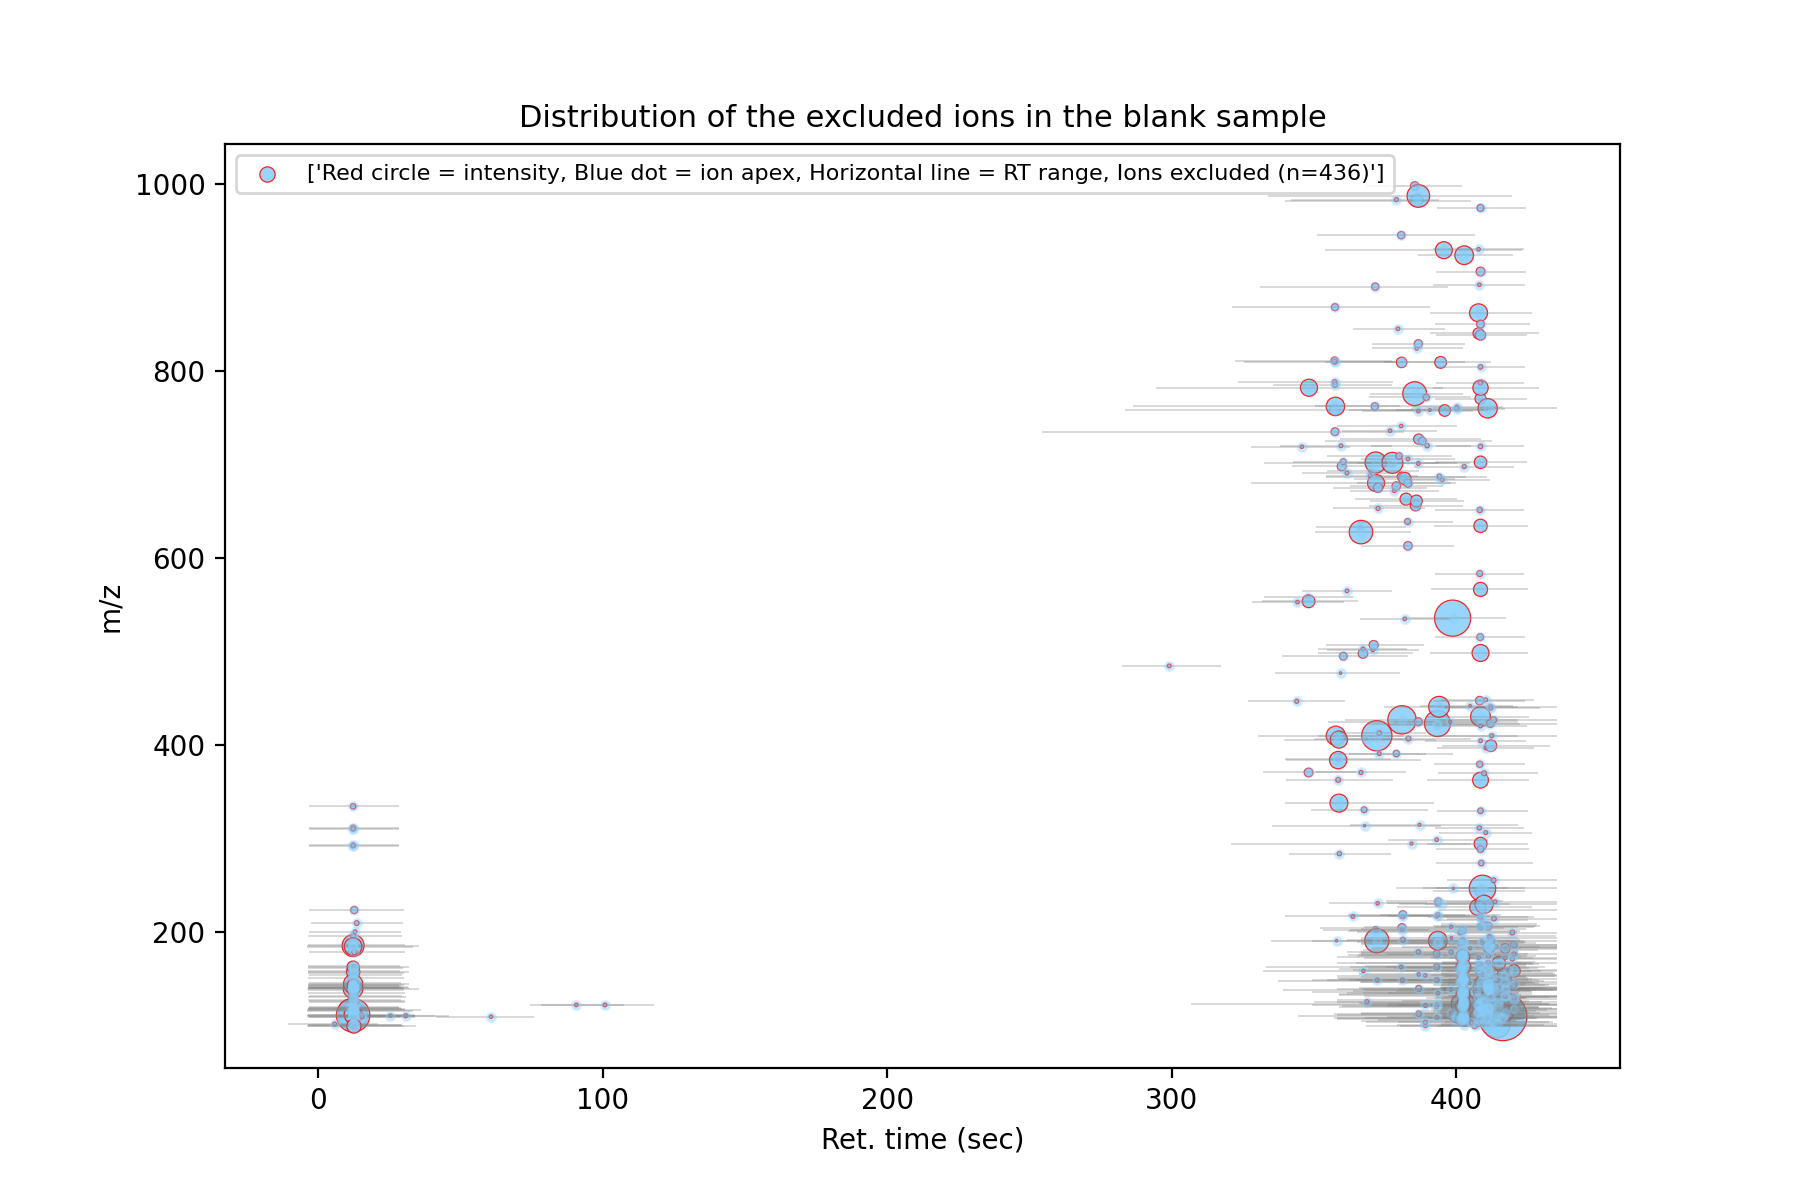

In [11]:
from IPython.display import Image
Image("results/plot_exclusion_RT_range_plot.png")

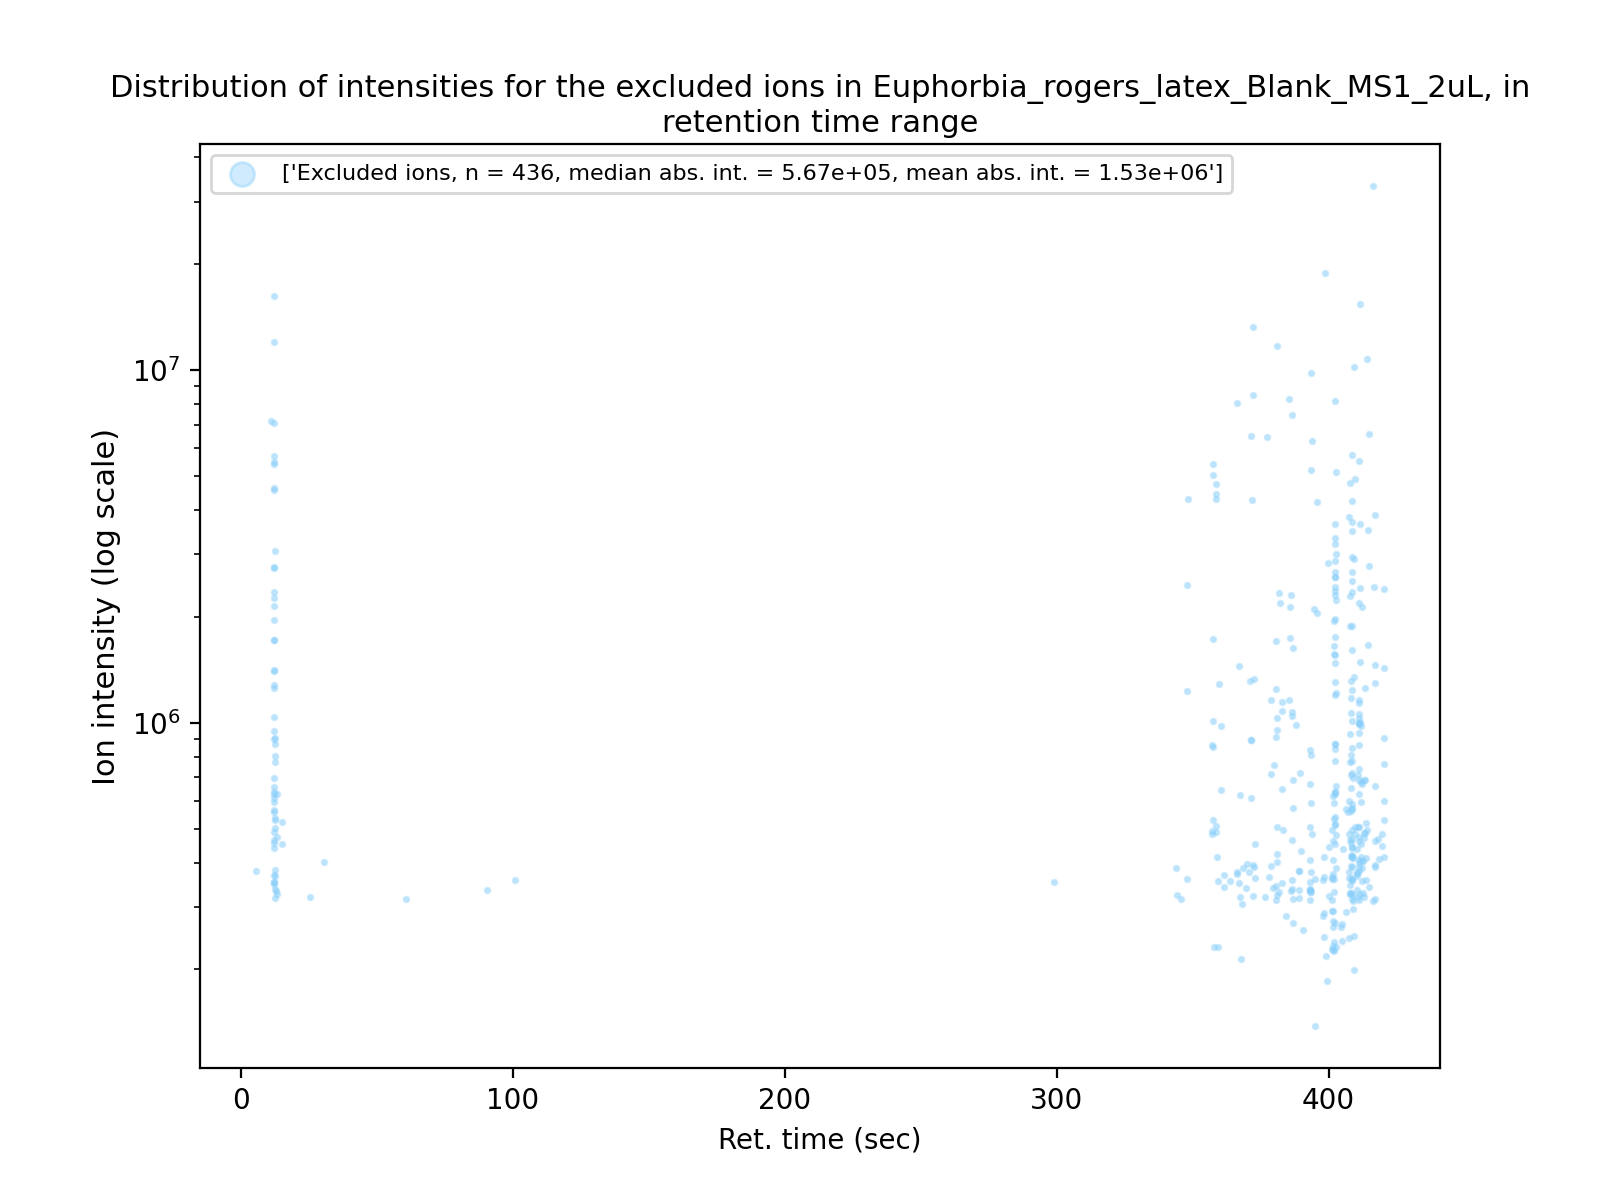

In [12]:
Image("results/plot_exclusion_scatter_RT.png")

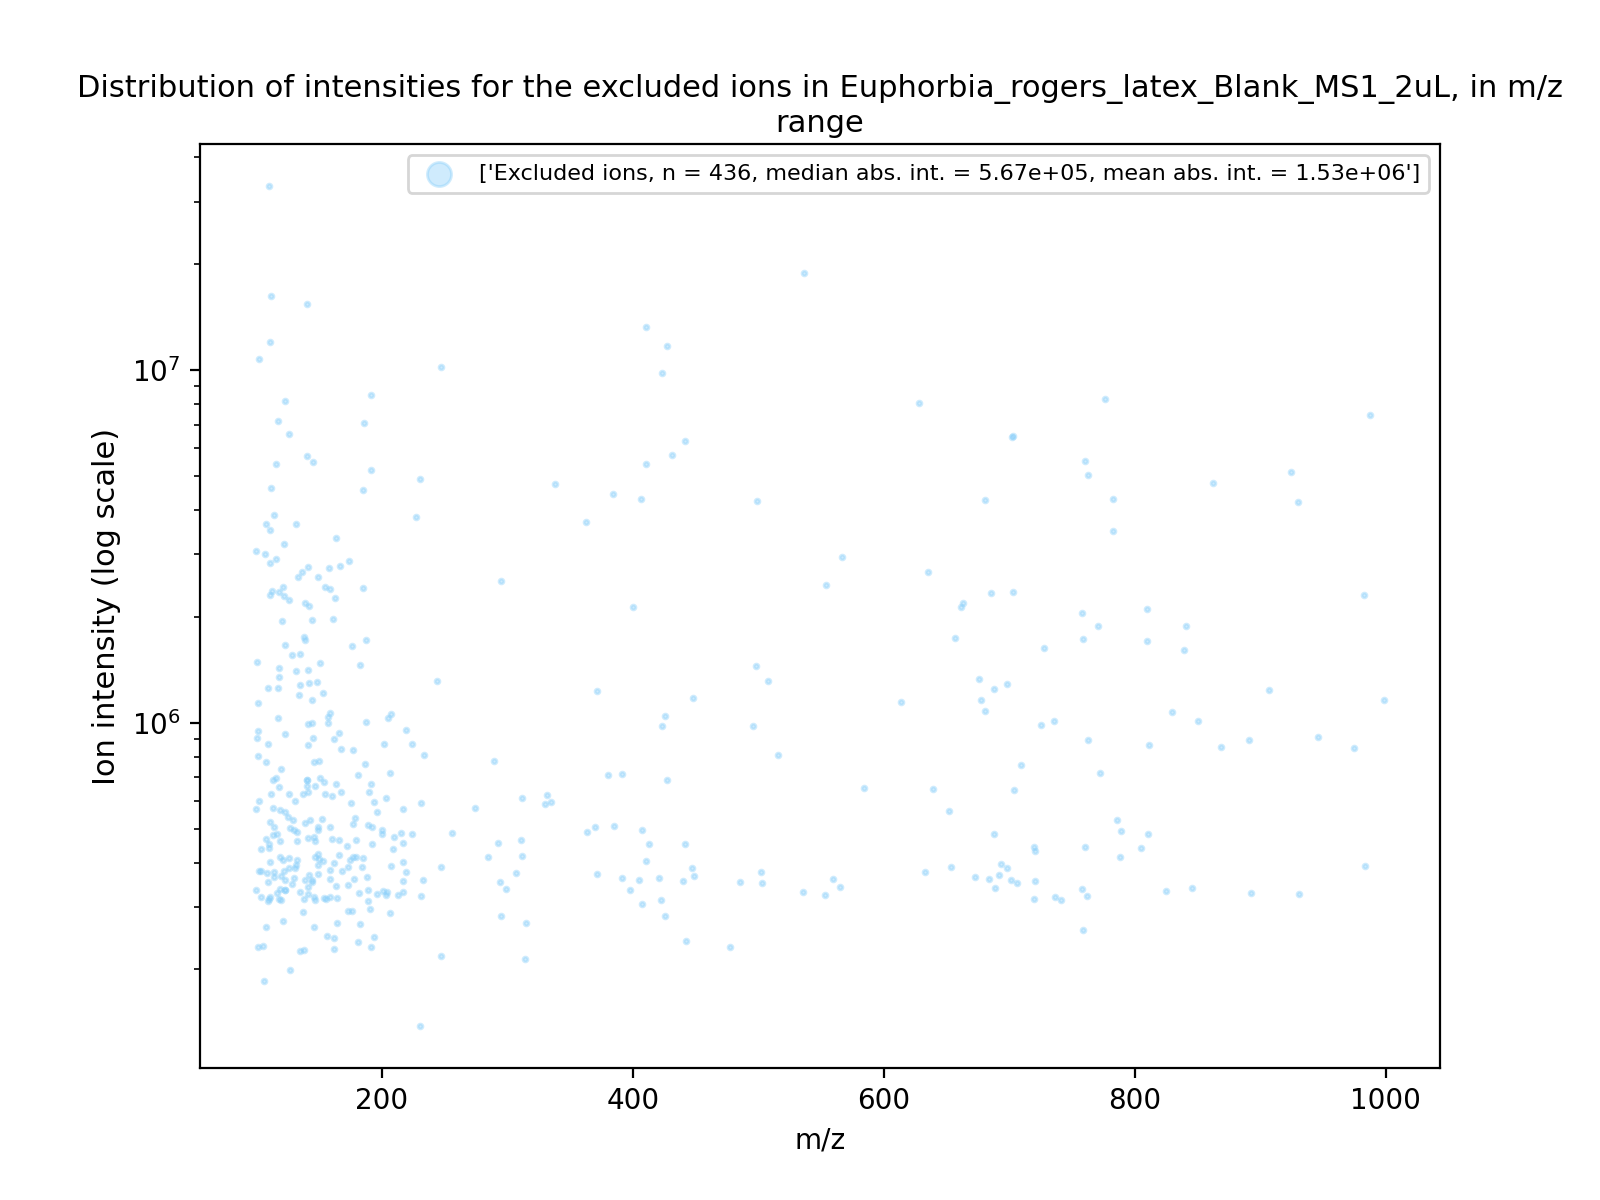

In [13]:
Image("results/plot_exclusion_scatter_MZ.png")

### Step 7 - Examine the results

**Visualize** : Run the cell below to show the scatter plot for the IODA-exclusion workflow results. The scatter plots shows the distribution of the ions excluded in the blank sample based on the parameters defined. Horizontal lines are indicating the retention time range for the ions/features excluded. 

- Examine the IODA-exclusion worflow log and the plots in order to verify that the *min_intensity* parameter is adapted to exclusion level you want to apply, and your sample(s) complexity. 
- You could also rerun the OpenMS processing with different parameter values *narrow_feature_noise* and *large_feature_noise*. The OpenMS processing parameters can be adjusted locally for optimal feature detection. [See the documentation](documentation.ipynb).

### Step 8 - Download the results

Run the cell below to display the download links for the IODA-exclusion workflow results:

In [15]:
from download_link_jupyterlab import DownloadFileLink
display(DownloadFileLink('download_results/IODA_exclusion_results.zip', file_name='download_results/IODA_exclusion_results.zip', link_text='Download the IODA exclusion workflow results from download_results/IODA_exclusion_results.zip'))

/home/jovyan/download_results/IODA_exclusion_results.zip

### Step 9 - Prepare your IODA experiment
Prepare the IODA experiment. For instructions on how to load and configure an target/inclusion list with XCalibur or MaxQuant.Live please refer to [the following documentation](nothing).